In [1]:
import pandas as pd
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
from config import *
import matplotlib.cm as cm
from scripts.plotting_MAE import *
import matplotlib.cm as cm
import os

In [2]:
file_paths_uncertainty = [
    MAE_PRIORS_10272, MAE_PRIORS_10275,
    MAE_PRIORS_10304, MAE_PRIORS_10311,
    MAE_PRIORS_10374, MAE_PRIORS_10399,
    MAE_PRIORS_10402, MAE_PRIORS_10403
]


dataset_paths = [
    MAE_PRIORS_10272_sawei, MAE_PRIORS_10275_sawei,
    MAE_PRIORS_10304_sawei, MAE_PRIORS_10311_sawei,
    MAE_PRIORS_10374_sawei, MAE_PRIORS_10399_sawei,
    MAE_PRIORS_10402_sawei, MAE_PRIORS_10403_sawei
]

dataset_labels = [
    "10272", "10275", "10304", "10311",
    "10374", "10399", "10402", "10403"
]


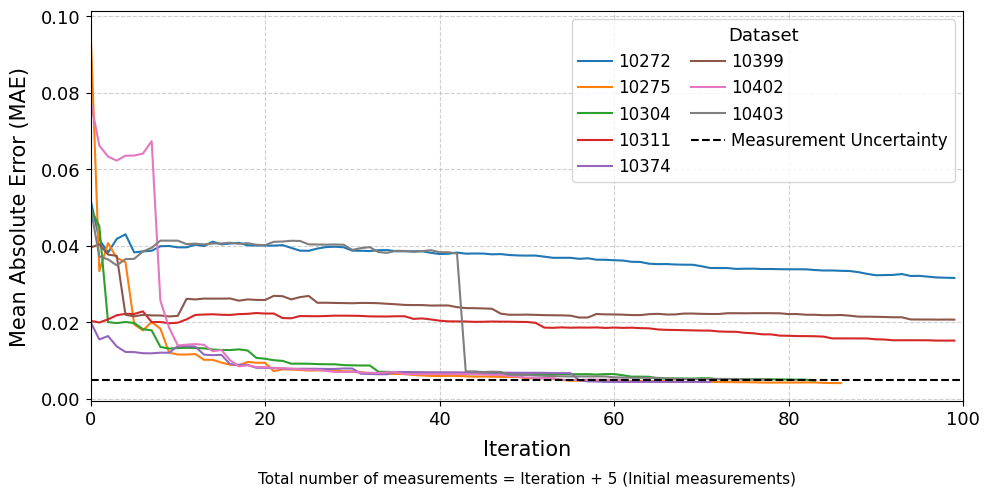

In [3]:
base_dir = MAE_PLOT
filename = "sawei_Centroids_saturation_low.pdf"
save_path = os.path.join(base_dir, filename)

plot_strategy_across_datasets(
    strategy="Centroids_saturation_low",
    dataset_paths=dataset_paths,
    dataset_labels=dataset_labels,
    save_path=save_path,
    measurement_uncertainty=0.005,
)


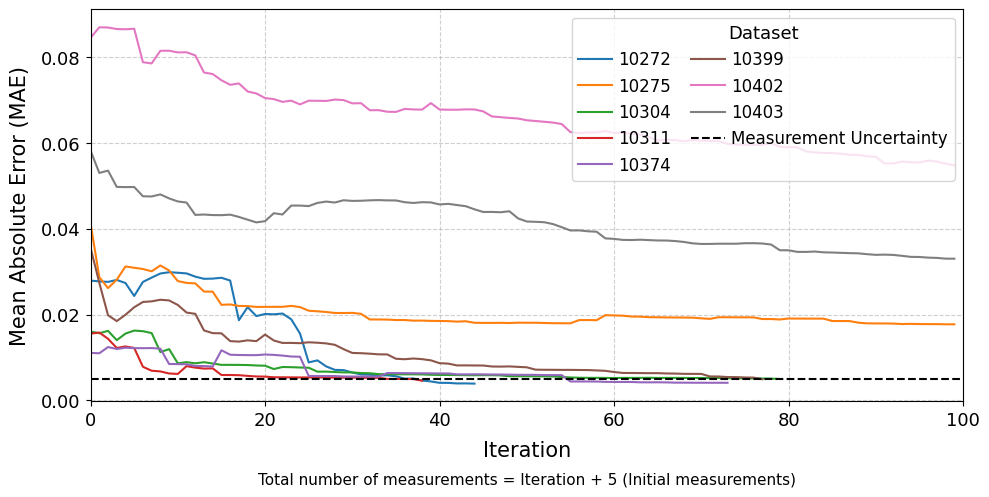

In [4]:
base_dir = MAE_PLOT
filename = "uncertainty_K-Center.pdf"
save_path = os.path.join(base_dir, filename)

plot_strategy_across_datasets(
    strategy="K-Center",
    dataset_paths=file_paths_uncertainty,
    dataset_labels=dataset_labels,
    save_path=save_path,
    measurement_uncertainty=0.005,
)

In [5]:
json_path = os.path.join(DATA_CLEAN_InIT_CHOICES, "10374_indices.json")
with open(json_path, "r") as f:
    init_choices = json.load(f)
            

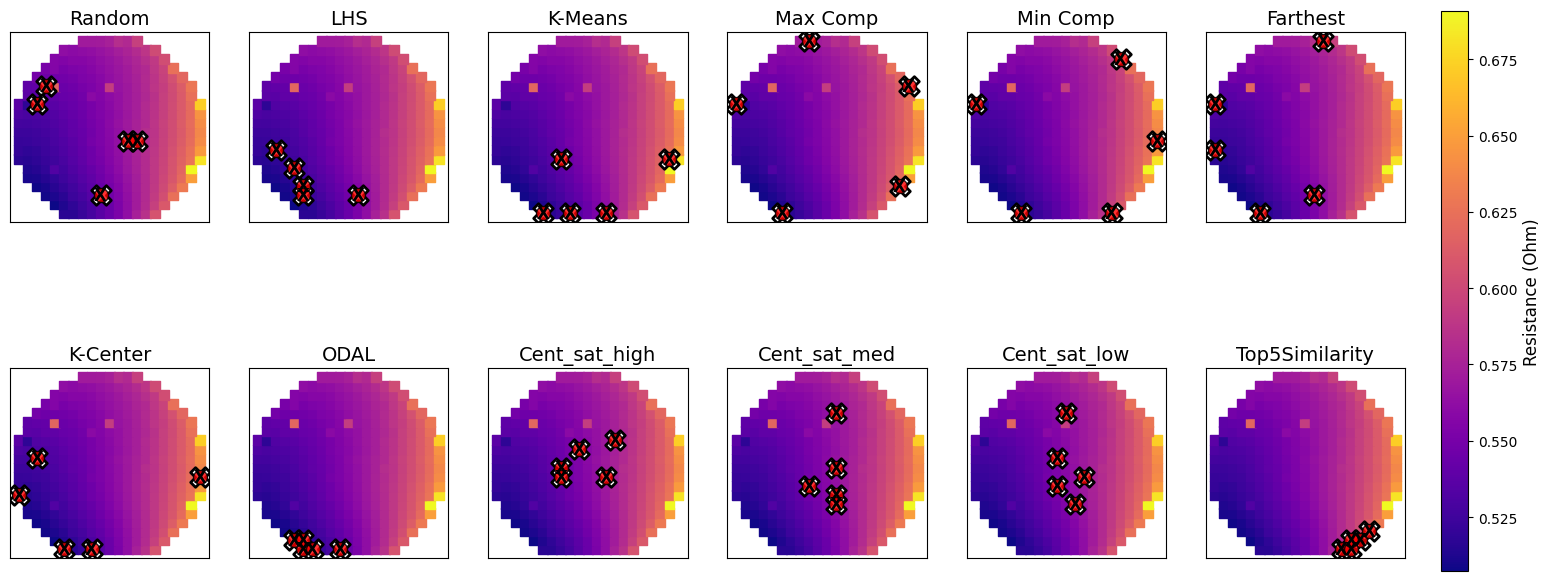

In [6]:
strategy_order = [
    "Random", "LHS", "K-Means", "Max Comp", "Min Comp", "Farthest",
    "K-Center", "ODAL", "Centroids_saturation_high",
    "Centroids_saturation_medium", "Centroids_saturation_low", "Top5Similarity"
]

strategy_rename = [
    "Random", "LHS", "K-Means", "Max Comp", "Min Comp", "Farthest",
    "K-Center", "ODAL", "Cent_sat_high", "Cent_sat_med", "Cent_sat_low", "Top5Similarity"
]



base_dir = MAE_PLOT
filename = "initialization_strategies_10374.pdf"
save_path = os.path.join(base_dir, filename)

plot_initialization_strategies(csv_path=DATASET_10374_Ir_Pd_Pt_Rh_Ru, 
    all_init_strategies=init_choices, strategy_order=strategy_order,
    strategy_rename=strategy_rename ,output_path=save_path)

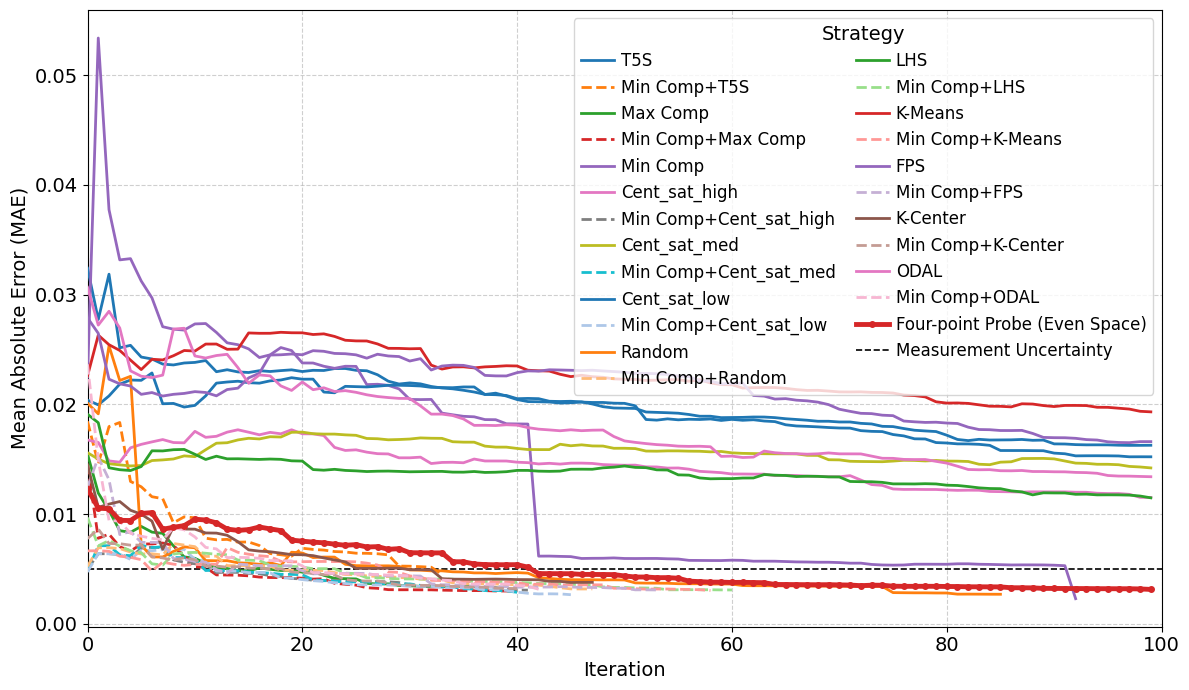

In [7]:
# ==== Define Constants ====
base_dir = MAE_PLOT
dataset_path = DATASET_10311_Au_Pd_Pt_Rh_Ru_RT
dataset_name = os.path.splitext(os.path.basename(dataset_path))[0]
output_dir = os.path.join(EVENLY_PATH_Sawei, dataset_name)

# ==== Read Data ====
# 1. Read the existing MAE results (for other strategies)
df = pd.read_csv(MAE_PRIORS_10311_sawei)

# 2. Read even_space MAE (from GPSawei run)
even_space_mae_path = os.path.join(output_dir, "mae_history_GPSawei.csv")
even_space_mae_df = pd.read_csv(even_space_mae_path)

# 3. Add even_space to a copy of the original DataFrame
df_with_even_space = df.iloc[:len(even_space_mae_df)].copy()
df_with_even_space["even_space"] = even_space_mae_df["MAE"].values

# 4. Display name mapping
STRATEGY_DISPLAY_NAMES["even_space"] = "Four-point Probe (Even Space)"


# 5. Add even_space to base_strategies
base_strategies_with_even_space = base_strategies + ["even_space"]

# 6. Save path
filename = "Min Comp-10311_even_space.pdf"
save_path = os.path.join(base_dir, filename)

# ==== Plot It ====
plot_all_base_and_mixed_strategies(
    df=df_with_even_space,
    main_strategy="Min Comp",
    base_strategies=base_strategies_with_even_space,
    save_path=save_path
)

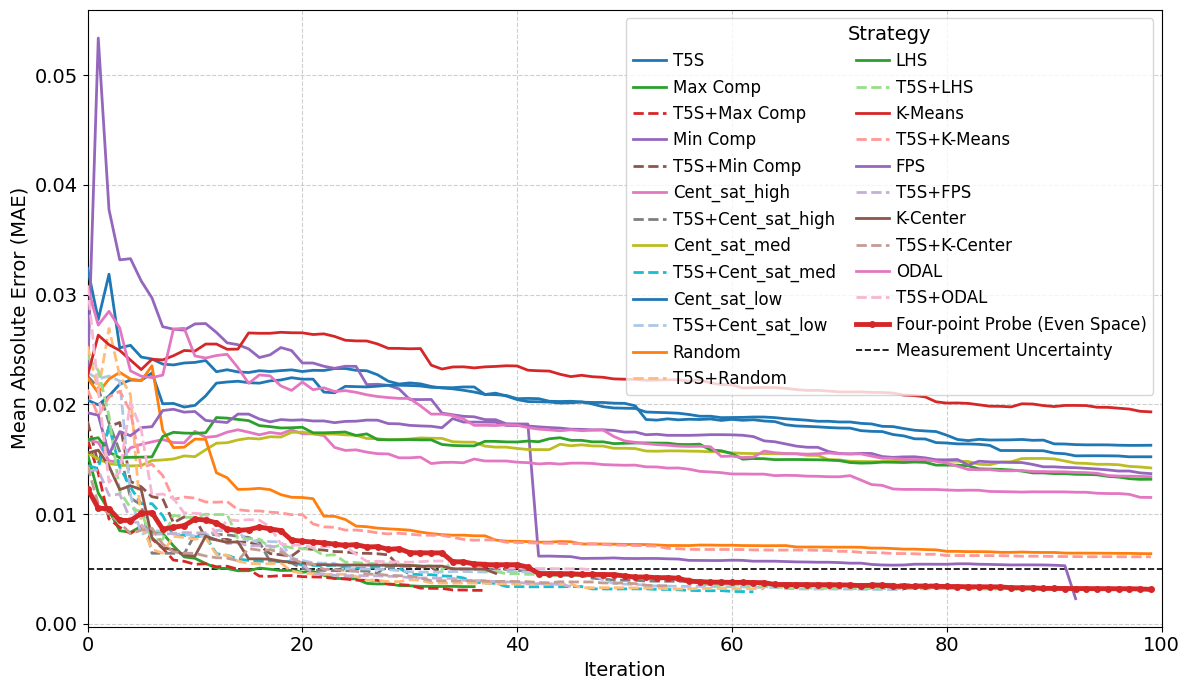

In [8]:

# ==== Define Constants ====
base_dir = MAE_PLOT
dataset_path = DATASET_10311_Au_Pd_Pt_Rh_Ru_RT
dataset_name = os.path.splitext(os.path.basename(dataset_path))[0]
output_dir = os.path.join(EVENLY_PATH_Uncertainty, dataset_name)

# ==== Read Data ====
# 1. Read the existing MAE results (for other strategies)
df = pd.read_csv(MAE_PRIORS_10311)

# 2. Read even_space MAE (from GPBasic run)
even_space_mae_path = os.path.join(output_dir, "mae_history_GPBasic.csv")
even_space_mae_df = pd.read_csv(even_space_mae_path)

# 3. Add even_space to a copy of the original DataFrame
df_with_even_space = df.iloc[:len(even_space_mae_df)].copy()
df_with_even_space["even_space"] = even_space_mae_df["MAE"].values

# 4. Display name mapping
STRATEGY_DISPLAY_NAMES["even_space"] = "Four-point Probe (Even Space)"


# 5. Add even_space to base_strategies
base_strategies_with_even_space = base_strategies + ["even_space"]

# 6. Save path
filename = "Top5Similarity-10311_even_space.pdf"
save_path = os.path.join(base_dir, filename)


plot_all_base_and_mixed_strategies(
    df=df_with_even_space,
    main_strategy="Top5Similarity",
    base_strategies=base_strategies_with_even_space,
    save_path=save_path
)